# Kernel Terbaik RBF Gamma 0.03 C 100

In [77]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI1 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI1")
DKI1_true = pd.read_excel("Validasi_Forecasting_2.xlsx", sheet_name="DKI1")
X_train = DKI1.index.values.reshape(-1, 1)
y_train = DKI1['PM10'].values.reshape(-1,)

gamma_value = 0.03
C_value=100

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['PM10'].min()
max_par = DKI1['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1_true['PM10']
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.104
MSE: 0.011
MAE: 0.082
R-Squared: 0.367
       Tanggal       PM10
0   2022-11-30  62.195122
1   2022-12-01  64.634146
2   2022-12-02  67.073171
3   2022-12-03  68.292683
4   2022-12-04  67.073171
5   2022-12-05  63.414634
6   2022-12-06  59.756098
7   2022-12-07  54.878049
8   2022-12-08  52.439024
9   2022-12-09  49.756098
10  2022-12-10  48.780488
11  2022-12-11  47.560976
12  2022-12-12  47.560976
13  2022-12-13  47.560976
14  2022-12-14  47.560976
15  2022-12-15  47.560976
16  2022-12-16  47.560976
17  2022-12-17  47.560976
18  2022-12-18  47.560976
19  2022-12-19  47.560976
20  2022-12-20  47.560976
21  2022-12-21  47.560976
22  2022-12-22  47.560976
23  2022-12-23  47.560976
24  2022-12-24  47.560976
25  2022-12-25  47.560976
26  2022-12-26  47.560976
27  2022-12-27  47.560976
28  2022-12-28  47.560976
29  2022-12-29  47.560976


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['PM10'].min()
max_par = DKI1['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1_true['PM10']

# Mean Absolute Deviation (MAD)
mad = mean_absolute_error(y_true, y_pred)

# Mean Squared Deviation (MSD)
msd = mean_squared_error(y_true, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("Mean Absolute Deviation (MAD): %.3f" % mad)
print("Mean Squared Deviation (MSD): %.3f" % msd)
print("Mean Absolute Percentage Error (MAPE): %.3f" % mape)
print(result_df)



Evaluation Metrics:
Mean Absolute Deviation (MAD): 0.082
Mean Squared Deviation (MSD): 0.011
Mean Absolute Percentage Error (MAPE): 20.041
       Tanggal       PM10
0   2022-11-30  62.195122
1   2022-12-01  64.634146
2   2022-12-02  67.073171
3   2022-12-03  68.292683
4   2022-12-04  67.073171
5   2022-12-05  63.414634
6   2022-12-06  59.756098
7   2022-12-07  54.878049
8   2022-12-08  52.439024
9   2022-12-09  49.756098
10  2022-12-10  48.780488
11  2022-12-11  47.560976
12  2022-12-12  47.560976
13  2022-12-13  47.560976
14  2022-12-14  47.560976
15  2022-12-15  47.560976
16  2022-12-16  47.560976
17  2022-12-17  47.560976
18  2022-12-18  47.560976
19  2022-12-19  47.560976
20  2022-12-20  47.560976
21  2022-12-21  47.560976
22  2022-12-22  47.560976
23  2022-12-23  47.560976
24  2022-12-24  47.560976
25  2022-12-25  47.560976
26  2022-12-26  47.560976
27  2022-12-27  47.560976
28  2022-12-28  47.560976
29  2022-12-29  47.560976


In [80]:
print(y_true)

0     0.609756
1     0.597561
2     0.731707
3     0.695122
4     0.695122
5     0.621951
6     0.609756
7     0.609756
8     0.536585
9     0.573171
10    0.439024
11    0.329268
12    0.268293
13    0.543846
14    0.543846
15    0.439024
16    0.543846
17    0.543846
18    0.543846
19    0.743902
20    0.543846
21    0.543846
22    0.543846
23    0.543846
24    0.543846
25    0.402439
26    0.390244
27    0.280488
28    0.256098
29    0.317073
Name: PM10, dtype: float64


In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.119
MSE: 0.014
MAE: 0.096
R-Squared: 0.249
       Tanggal       PM10
0   2022-11-30  62.195122
1   2022-12-01  64.634146
2   2022-12-02  67.073171
3   2022-12-03  68.292683
4   2022-12-04  67.073171
5   2022-12-05  63.414634
6   2022-12-06  59.756098
7   2022-12-07  54.878049
8   2022-12-08  52.439024
9   2022-12-09  49.756098
10  2022-12-10  48.780488
11  2022-12-11  47.560976
12  2022-12-12  47.560976
13  2022-12-13  47.560976
14  2022-12-14  47.560976
15  2022-12-15  47.560976
16  2022-12-16  47.560976
17  2022-12-17  47.560976
18  2022-12-18  47.560976
19  2022-12-19  47.560976
20  2022-12-20  47.560976
21  2022-12-21  47.560976
22  2022-12-22  47.560976
23  2022-12-23  47.560976
24  2022-12-24  47.560976
25  2022-12-25  47.560976
26  2022-12-26  47.560976
27  2022-12-27  47.560976
28  2022-12-28  47.560976
29  2022-12-29  47.560976


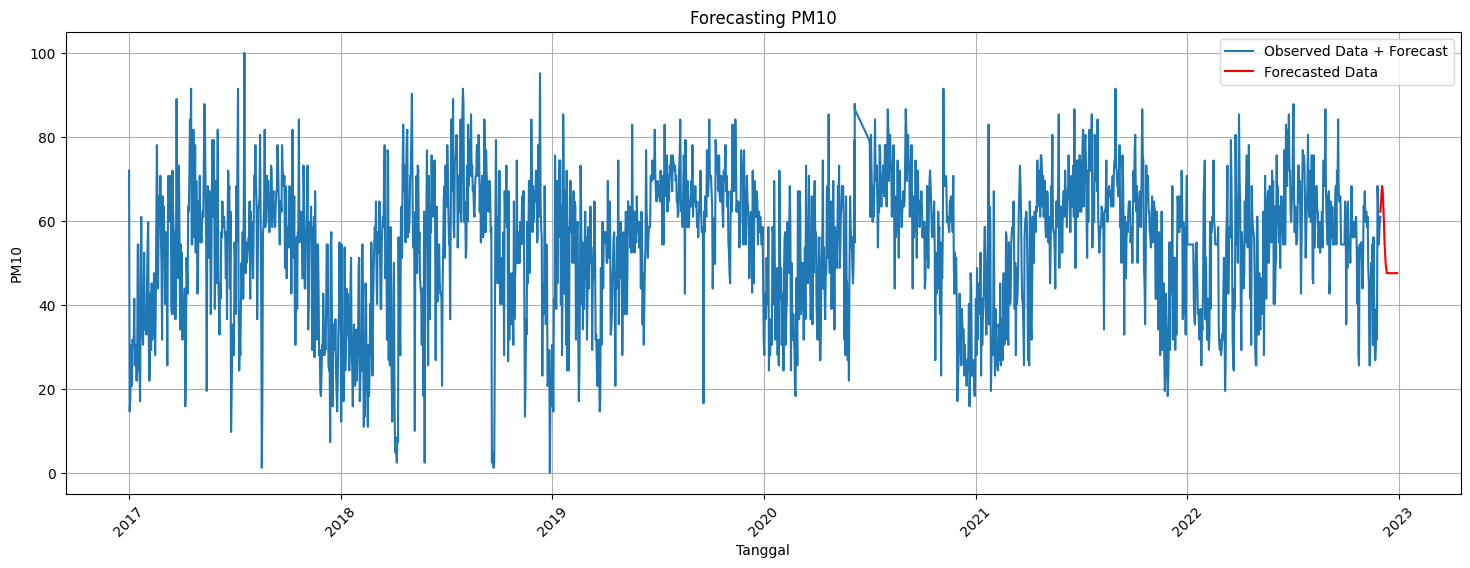

In [82]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


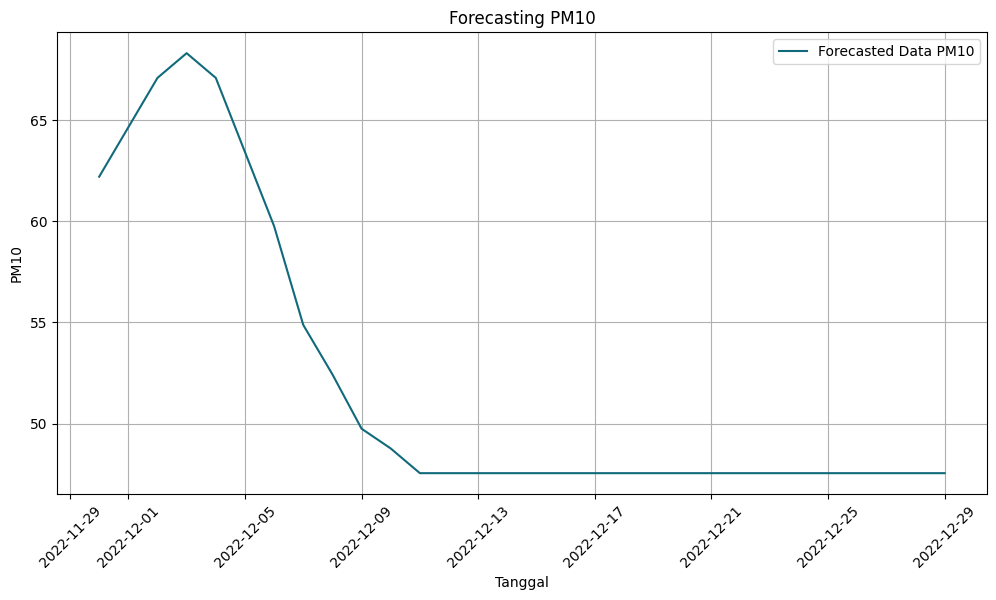

In [83]:

plt.figure(figsize=(12, 6))
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data PM10', color='#116A7B')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [84]:
# Menyimpan DataFrame ke dalam file Excel
#result_df.to_excel('C:/OBIE/Tel - U/SEM 7/PTA/BISMILLAH/Code/TA_COBA_KELM1/Forecasting/DKI1_PM10_Forecast.xlsx', index=False)